EDA & Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings as w
w.filterwarnings('ignore')

In [3]:
# reading dataset

df = pd.read_csv('students_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# checking missing values 

df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No missing values in dataset

In [7]:
# checing for duplicates 

df.duplicated().sum()

np.int64(0)

No duplicate values were found

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# checking for unique values

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
for col in df.select_dtypes('object').columns:
    print(f'unique values for {col} :{df[col].unique()} ')

unique values for gender :['female' 'male'] 
unique values for race_ethnicity :['group B' 'group C' 'group A' 'group D' 'group E'] 
unique values for parental_level_of_education :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
unique values for lunch :['standard' 'free/reduced'] 
unique values for test_preparation_course :['none' 'completed'] 


In [18]:
# statistical insight
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Distributions are roughly symmetric since means & meadians are almost same.

Few outliers exist ex: min. math_score=0,	min. reading_score=17,	min. writing_score=10

In [ ]:
# defining numerical & categorical features

num_feats = [feat for feat in df.select_dtypes(['int','float']).columns]
cat_feats = [feat for feat in df.select_dtypes('object').columns]

print('numeriacl features :',num_feats)
print('categorical features :',cat_feats)


numeriacl features : ['math_score', 'reading_score', 'writing_score']
categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [25]:
# Feature engg. : adding new columns

df['Total_score'] = df[num_feats[0]]+df[num_feats[1]]+df[num_feats[2]]

df['Avg_score'] = np.round(df['Total_score']/3,2)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [33]:
(df[num_feats[1]]==100).sum()      # number of students scoring out of out

(df[num_feats[0]]<=20).sum()      # number of students scoring <= 20

np.int64(4)

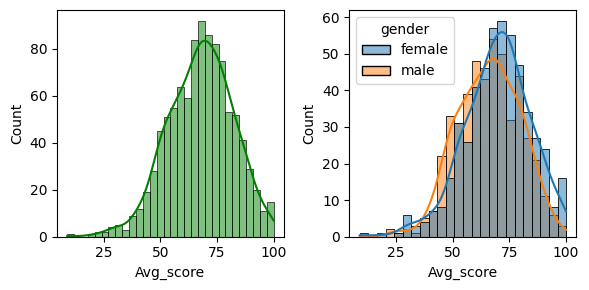

In [46]:
# visualisation : histogram

plt.figure(figsize=(6,3))
plt.subplot(121)
sns.histplot(df['Avg_score'],bins=30,kde=True,color='green')

plt.subplot(122)
sns.histplot(df,x=df['Avg_score'],kde=True,hue='gender')

plt.tight_layout()
plt.show()